# Multiligual Cyberbullying Detection

In [7]:
#basic library
import pandas as pd
import numpy as np
import math
import logging
logging = logging.getLogger("logger")
logging.info("Python logging")

#pre-processing library 
import re
from indicnlp.tokenize import indic_tokenize
from TurkishStemmer import TurkishStemmer
import nltk
from nltk.stem.snowball import SnowballStemmer
import stanza
from nltk.corpus import stopwords

#plotting
import chart_studio.plotly as py
import seaborn as sns
import plotly.express as px
import cufflinks as cf
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot #for running in jupyter notebook
init_notebook_mode(connected=True)
cf.go_offline()



### Language Labelling
<p>This notebbok operate on 10 multiple langauges and here are the labels for them</p> 
<b>Hindi: 1 </b>
<b>Bengali: 2 </b>
<b>Punjabi: 3 </b>
<b>Tamil: 4 </b>
<b>Telugu: 5 </b><br>
<b>Kannada: 6 </b>
<b>French: 7 </b>
<b>Turkish: 8 </b>
<b>Indonesian: 9 </b>
<b>English: 10 </b>

In [2]:
hinStop = ["मैं","मुझको","मेरा","अपने आप को","हमने","हमारा","अपना","हम","आप","आपका","तुम्हारा","अपने आप","स्वयं","वह","इसे","उसके","खुद को","कि वह","उसकी","उसका","खुद ही","यह","इसके","उन्होने","अपने","क्या","जो","किसे","किसको","कि","ये","हूँ","होता है","रहे","थी","थे","होना","गया","किया जा रहा है","किया है","है","पडा","होने","करना","करता है","किया","रही","एक","लेकिन","अगर","या","क्यूंकि","जैसा","जब तक","जबकि","की","पर","द्वारा","के लिए","साथ","के बारे में","खिलाफ","बीच","में","के माध्यम से","दौरान","से पहले","के बाद","ऊपर","नीचे","को","से","तक","से नीचे","करने में","निकल","बंद","से अधिक","तहत","दुबारा","आगे","फिर","एक बार","यहाँ","वहाँ","कब","कहाँ","क्यों","कैसे","सारे","किसी","दोनो","प्रत्येक","ज्यादा","अधिकांश","अन्य","में कुछ","ऐसा","में कोई","मात्र","खुद","समान","इसलिए","बहुत","सकता","जायेंगे","जरा","चाहिए","अभी","और","कर दिया","रखें","का","हैं","इस","होता","करने","ने","बनी","तो","ही","हो","इसका","था","हुआ","वाले","बाद","लिए","सकते","इसमें","दो","वे","करते","कहा","वर्ग","कई","करें","होती","अपनी","उनके","यदि","हुई","जा","कहते","जब","होते","कोई","हुए","व","जैसे","सभी","करता","उनकी","तरह","उस","आदि","इसकी","उनका","इसी","पे","तथा","भी","परंतु","इन","कम","दूर","पूरे","गये","तुम","मै","यहां","हुये","कभी","अथवा","गयी","प्रति","जाता","इन्हें","गई","अब","जिसमें","लिया","बड़ा","जाती","तब","उसे","जाते","लेकर","बड़े","दूसरे","जाने","बाहर","स्थान","उन्हें ","गए","ऐसे","जिससे","समय","दोनों","किए","रहती","इनके","इनका","इनकी","सकती","आज","कल","जिन्हें","जिन्हों","तिन्हें","तिन्हों","किन्हों","किन्हें","इत्यादि","इन्हों","उन्हों","बिलकुल","निहायत","इन्हीं","उन्हीं","जितना","दूसरा","कितना","साबुत","वग़ैरह","कौनसा","लिये","दिया","जिसे","तिसे","काफ़ी","पहले","बाला","मानो","अंदर","भीतर","पूरा","सारा","उनको","वहीं","जहाँ","जीधर","﻿के","एवं","कुछ","कुल","रहा","जिस","जिन","तिस","तिन","कौन","किस","संग","यही","बही","उसी","मगर","कर","मे","एस","उन","सो","अत","",]

In [3]:
benStop = ["অতএব","অথচ","অথবা","অনুযায়ী","অনেক","অনেকে","অনেকেই","অন্তত","অন্য","অবধি","অবশ্য","অর্থাত","আই","আগামী","আগে","আগেই","আছে","আজ","আদ্যভাগে","আপনার","আপনি","আবার","আমরা","আমাকে","আমাদের","আমার","আমি","আর","আরও","ই","ইত্যাদি","ইহা","উচিত","উত্তর","উনি","উপর","উপরে","এ","এঁদের","এঁরা","এই","একই","একটি","একবার","একে","এক্","এখন","এখনও","এখানে","এখানেই","এটা","এটাই","এটি","এত","এতটাই","এতে","এদের","এব","এবং","এবার","এমন","এমনকী","এমনি","এর","এরা","এল","এস","এসে","ঐ","ও","ওঁদের","ওঁর","ওঁরা","ওই","ওকে","ওখানে","ওদের","ওর","ওরা","কখনও","কত","কবে","কমনে","কয়েক","কয়েকটি","করছে","করছেন","করতে","করবে","করবেন","করলে","করলেন","করা","করাই","করায়","করার","করি","করিতে","করিয়া","করিয়ে","করে","করেই","করেছিলেন","করেছে","করেছেন","করেন","কাউকে","কাছ","কাছে","কাজ","কাজে","কারও","কারণ","কি","কিংবা","কিছু","কিছুই","কিন্তু","কী","কে","কেউ","কেউই","কেখা","কেন","কোটি","কোন","কোনও","কোনো","ক্ষেত্রে","কয়েক","খুব","গিয়ে","গিয়েছে","গিয়ে","গুলি","গেছে","গেল","গেলে","গোটা","চলে","চান","চায়","চার","চালু","চেয়ে","চেষ্টা","ছাড়া","ছাড়াও","ছিল","ছিলেন","জন","জনকে","জনের","জন্য","জন্যওজে","জানতে","জানা","জানানো","জানায়","জানিয়ে","জানিয়েছে","জে","জ্নজন","টি","ঠিক","তখন","তত","তথা","তবু","তবে","তা","তাঁকে","তাঁদের","তাঁর","তাঁরা","তাঁাহারা","তাই","তাও","তাকে","তাতে","তাদের","তার","তারপর","তারা","তারৈ","তাহলে","তাহা","তাহাতে","তাহার","তিনঐ","তিনি","তিনিও","তুমি","তুলে","তেমন","তো","তোমার","থাকবে","থাকবেন","থাকা","থাকায়","থাকে","থাকেন","থেকে","থেকেই","থেকেও","দিকে","দিতে","দিন","দিয়ে","দিয়েছে","দিয়েছেন","দিলেন","দু","দুই","দুটি","দুটো","দেওয়া","দেওয়ার","দেওয়া","দেখতে","দেখা","দেখে","দেন","দেয়","দ্বারা","ধরা","ধরে","ধামার","নতুন","নয়","না","নাই","নাকি","নাগাদ","নানা","নিজে","নিজেই","নিজেদের","নিজের","নিতে","নিয়ে","নিয়ে","নেই","নেওয়া","নেওয়ার","নেওয়া","নয়","পক্ষে","পর","পরে","পরেই","পরেও","পর্যন্ত","পাওয়া","পাচ","পারি","পারে","পারেন","পি","পেয়ে","পেয়্র্","প্রতি","প্রথম","প্রভৃতি","প্রযন্ত","প্রাথমিক","প্রায়","প্রায়","ফলে","ফিরে","ফের","বক্তব্য","বদলে","বন","বরং","বলতে","বলল","বললেন","বলা","বলে","বলেছেন","বলেন","বসে","বহু","বা","বাদে","বার","বি","বিনা","বিভিন্ন","বিশেষ","বিষয়টি","বেশ","বেশি","ব্যবহার","ব্যাপারে","ভাবে","ভাবেই","মতো","মতোই","মধ্যভাগে","মধ্যে","মধ্যেই","মধ্যেও","মনে","মাত্র","মাধ্যমে","মোট","মোটেই","যখন","যত","যতটা","যথেষ্ট","যদি","যদিও","যা","যাঁর","যাঁরা","যাওয়া","যাওয়ার","যাওয়া","যাকে","যাচ্ছে","যাতে","যাদের","যান","যাবে","যায়","যার","যারা","যিনি","যে","যেখানে","যেতে","যেন","যেমন","র","রকম","রয়েছে","রাখা","রেখে","লক্ষ","শুধু","শুরু","সঙ্গে","সঙ্গেও","সব","সবার","সমস্ত","সম্প্রতি","সহ","সহিত","সাধারণ","সামনে","সি","সুতরাং","সে","সেই","সেখান","সেখানে","সেটা","সেটাই","সেটাও","সেটি","স্পষ্ট","স্বয়ং","হইতে","হইবে","হইয়া","হওয়া","হওয়ায়","হওয়ার","হচ্ছে","হত","হতে","হতেই","হন","হবে","হবেন","হয়","হয়তো","হয়নি","হয়ে","হয়েই","হয়েছিল","হয়েছে","হয়েছেন","হল","হলে","হলেই","হলেও","হলো","হাজার","হিসাবে","হৈলে","হোক","হয়"]

In [4]:
punStop = ["ਦੇ","ਹੈ।","ਵਿੱਚ","ਦਾ","ਅਤੇ","ਦੀ","ਇੱਕ","ਨੂੰ","ਹੈ","ਤੋਂ","ਇਸ","ਇਹ","ਨੇ","ਤੇ","ਨਾਲ","ਲਈ","ਵੀ","ਸੀ।","ਹਨ।","ਸੀ","ਵਿਚ","ਕਿ","ਜੋ","ਉਹ","ਉਸ","ਹਨ","ਜਾਂਦਾ","ਕੀਤਾ","ਗਿਆ","ਹੀ","ਕੇ","ਜਾਂ","ਦੀਆਂ","ਜਿਸ","ਕਰਨ","ਹੋ","ਕਰ","ਆਪਣੇ","ਕੀਤੀ","ਤੌਰ","ਬਾਅਦ","ਨਹੀਂ","ਭਾਰਤੀ","ਪਿੰਡ","ਸਿੰਘ","ਉੱਤੇ","ਸਾਲ","ਪੰਜਾਬ","ਸਭ","ਭਾਰਤ","ਉਨ੍ਹਾਂ","ਹੁੰਦਾ","ਤੱਕ","ਇਕ","ਹੋਇਆ","ਜਨਮ","ਬਹੁਤ","ਪਰ","ਸਨ।","ਦੁਆਰਾ","ਰੂਪ","ਹੋਰ","ਕੰਮ","ਆਪਣੀ","ਤਾਂ","ਸਮੇਂ","ਪੰਜਾਬੀ","ਗਈ","ਦਿੱਤਾ","ਦੋ","ਕਿਸੇ","ਕਈ","ਜਾ","ਵਾਲੇ","ਸ਼ੁਰੂ","ਉਸਨੇ","ਗਿਆ।","ਕਿਹਾ","ਹੋਣ","ਲੋਕ","ਜਾਂਦੀ","ਵਿੱਚੋਂ","ਨਾਮ","ਕੀਤਾ।","ਜਦੋਂ","ਪਹਿਲਾਂ","ਕਰਦਾ","ਹੁੰਦੀ","ਹੋਏ","ਸਨ","ਵਜੋਂ","ਰਾਜ","ਕੀਤੀ।","ਮੁੱਖ","ਕਰਦੇ","ਕੁਝ","ਸਾਰੇ","ਹੁੰਦੇ","ਸ਼ਹਿਰ","ਭਾਸ਼ਾ","ਹੋਈ","ਅਨੁਸਾਰ","ਸਕਦਾ","ਆਮ","ਵੱਖ","ਕੋਈ","ਵਾਰ","ਗਏ","ਖੇਤਰ","ਜੀ","ਕਾਰਨ","ਕਰਕੇ","ਹੋਇਆ।","ਜਿਵੇਂ","ਜ਼ਿਲ੍ਹੇ","ਲੋਕਾਂ","ਚ","ਸਾਹਿਤ","ਸਦੀ","ਬਾਰੇ","ਜਾਂਦੇ","ਵਾਲਾ","ਜਾਣ","ਪਹਿਲੀ","ਪ੍ਰਾਪਤ","ਰਿਹਾ","ਵਾਲੀ","ਨਾਂ","ਦੌਰਾਨ","ਤਰ੍ਹਾਂ","ਯੂਨੀਵਰਸਿਟੀ","ਨਾ","ਏ","ਤਿੰਨ","ਇਨ੍ਹਾਂ","ਗੁਰੂ","ਇਸਨੂੰ","ਇਹਨਾਂ","ਪਿਤਾ","ਲਿਆ","ਸ਼ਾਮਲ","ਸ਼ਬਦ","ਅੰਗਰੇਜ਼ੀ","ਉਸਨੂੰ","ਉਹਨਾਂ","ਸਥਿਤ","ਫਿਰ","ਜੀਵਨ","ਸਕੂਲ","ਹੁਣ","ਦਿਨ","ਕੀਤੇ","ਆਦਿ","ਵੱਧ","ਲੈ","ਘਰ","ਵੱਲ","ਦੇਸ਼","ਵਲੋਂ","ਬਣ","ਵੀਂ","ਫਿਲਮ","ਉਮਰ","ਬਲਾਕ","ਰਹੇ","ਸਾਹਿਬ","ਕਰਦੀ","ਹਰ","ਪੈਦਾ","ਘੱਟ","9","ਲੇਖਕ","ਹਿੱਸਾ","ਫ਼ਿਲਮ","ਮੌਤ","ਜਿੱਥੇ","ਵੱਡਾ","ਵਿਖੇ","ਆਪਣਾ","ਪਹਿਲਾ","ਵਰਤੋਂ","ਗਈ।","ਆਪ","ਕਰਨਾ","ਵਿਆਹ","ਰਹੀ","ਰਾਹੀਂ","ਦਿੱਤੀ","ਉਸਦੇ","ਪਰਿਵਾਰ","ਆ","ਦੂਜੇ","ਅਮਰੀਕਾ","ਮੰਨਿਆ","ਇਸਦੇ","ਈ","ਕਾਲਜ","ਸਰਕਾਰ","ਇੱਥੇ","ਪਾਕਿਸਤਾਨ","ਸ਼ਾਮਿਲ","ਵਿਗਿਆਨ","ਉਸਦੀ","ਪੇਸ਼","ਕਿਉਂਕਿ","ਪਹਿਲੇ","ਧਰਮ","ਦਿੱਤਾ।","ਮਸ਼ਹੂਰ","ਅੰਦਰ","ਵਿਚੋਂ","ਜਿਨ੍ਹਾਂ","ਜਾਣਿਆ","ਪਾਣੀ","ਇਲਾਵਾ","ਅਰਥ","ਚਾਰ","ਪ੍ਰਸਿੱਧ","ਨਾਵਲ","ਵੱਡੇ","ਵੱਲੋਂ","ਕਹਾਣੀ","ਵਿਸ਼ਵ","ਮੂਲ","ਅਮਰੀਕੀ","ਸਥਾਨ","ਇਤਿਹਾਸ","ਕੁੱਝ","ਵਿਕਾਸ","ਉੱਤਰ","ਸਿੱਖਿਆ","ਹਿੰਦੀ","ਪ੍ਰਮੁੱਖ","ਰਚਨਾ","ਗਏ।","ਬਣਾਇਆ","ਵਿਸ਼ੇਸ਼","ਡਾ","ਉੱਪਰ","ਪੱਛਮੀ","ਦੇਣ","ਇਸਦਾ","ਸਕਦੇ","ਰੱਖਿਆ","ਕਵੀ","ਦਿੱਲੀ","ਵੱਡੀ","ਭੂਮਿਕਾ","ਸਮਾਜ","ਕਾਵਿ","ਕੀ","ਕੋਲ","ਦ","ਗੱਲ","ਸੰਸਾਰ","ਭਾਗ","ਆਈ","ਦੱਖਣ","ਅੱਜ","ਸਿੱਖ","ਕਹਿੰਦੇ","ਸੰਗੀਤ","ਕਿਲੋਮੀਟਰ","ਜਿਹਨਾਂ","ਸਭਾ","ਜਿਸਦਾ","ਜਨਵਰੀ","13","ਕਵਿਤਾ","ਮੈਂਬਰ","ਲਿਖਿਆ","ਮਾਂ","ਕਲਾ","ਪੰਜ","ਥਾਂ","ਹੇਠ","ਜਿਆਦਾ","ਵਰਤਿਆ","ਮਾਰਚ","ਡੀ","ਅਕਤੂਬਰ","14","19","ਤਕ","16","ਨਾਟਕ","ਬੀ","ਖਾਸ","ਇਸੇ","ਆਧੁਨਿਕ","ਅਗਸਤ","ਤਿਆਰ","ਮਾਤਾ","18","ਬਣਾਉਣ","ਨਵੰਬਰ","ਵਿਅਕਤੀ","ਦੱਖਣੀ","ਦਸੰਬਰ","ਆਫ","ਗੀਤ","ਗਿਣਤੀ","ਕਾਲ","ਖੋਜ","ਸਾਲਾਂ","ਪੂਰੀ","ਸਮਾਂ","ਜ਼ਿਆਦਾ","ਇਸਦੀ","ਸਕਦੀ","ਵਿਚਕਾਰ","ਰਾਜਧਾਨੀ","30","ਉਸਦਾ","ਲਿਆ।","ਜੁਲਾਈ","ਹੋਈ।","ਜੂਨ","ਅਧੀਨ","ਸਥਾਪਨਾ","ਸੇਵਾ","ਭਾਵ","ਵਰਗ","ਛੋਟੇ","ਦਿੰਦਾ","ਸਮਾਜਿਕ","ਹੁੰਦੀਆਂ","ਟੀਮ","ਔਰਤਾਂ","ਅਕਸਰ","ਪ੍ਰਕਾਸ਼ਿਤ","17","ਉਰਦੂ","ਰੰਗ","ਪਾਰਟੀ","ਬਣਾ","ਪ੍ਰਭਾਵ","ਸ਼ੁਰੂਆਤ","ਲਗਭਗ","ਮਈ","ਸਿਰਫ","ਨੇੜੇ","ਜਿਸਨੂੰ","ਹਾਲਾਂਕਿ","ਦੂਰ","ਸਤੰਬਰ","ਕਿਤਾਬ","2011","ਕਦੇ","n","ਉੱਤਰੀ","ਪ੍ਰਕਾਰ","ਇਸਨੇ","ਪ੍ਰਦੇਸ਼","ਅੱਗੇ","ਸੰਯੁਕਤ","ਪੜ੍ਹਾਈ","ਵਧੇਰੇ","ਨਾਲ਼","ਮਨੁੱਖ","000","ਬਾਕੀ","ਪ੍ਰਧਾਨ","ਦੂਜੀ","ਕੁੱਲ","ਆਫ਼","ਅਧਿਐਨ","ਰਾਸ਼ਟਰੀ","ਪੁੱਤਰ","ਅੰਤਰਰਾਸ਼ਟਰੀ","ਧਰਤੀ","ਕੇਂਦਰ","ਦੇਸ਼ਾਂ","ਮੱਧ","ਜ਼ਿਲ੍ਹਾ","ਸਾਰੀਆਂ","ਪੱਧਰ","2012","ਹੋਵੇ","ਜੇ","ਭਾਈ","ਰਹਿਣ","ਪੁਰਸਕਾਰ","ਸਭਿਆਚਾਰ","ਪਤਾ","ਪਾਸੇ","ਨਵੇਂ","ਕੰਪਨੀ","ਬਾਹਰ","ਵੇਲੇ","ਸੰਨ","25","ਪੂਰਬੀ","ਵਿਚਾਰ","e","ਕਾਰਜ","ਪੀ","ਮਹੱਤਵਪੂਰਨ","ਦੁਨੀਆਂ","ਧਾਰਮਿਕ","ਮਨੁੱਖੀ","ਸਮੂਹ","ਅਜਿਹੇ","ਲਾਲ","ਦੂਜਾ","ਭਰਾ","ਸ੍ਰੀ","ਅੰਤ","ਜਾਂਦੀਆਂ","i","ਸ਼ਾਹ","ਰਹਿੰਦੇ","ਮਹਾਨ","ਚੀਨ","ਮੀਟਰ","ਵਰਗੇ","ਨਾਲੋਂ","ਹਾਸਲ","ਕਿਸਮ","ਅਜਿਹਾ","ਬਣਿਆ","ਭਰ","ਛੱਡ","ਲੈਣ","ਹਿੱਸੇ","29","ਟੀ","ਲਿਖੇ","ਮਿਲ","ਮੌਜੂਦ","ਦਿੱਤੇ","ਵਾਸਤੇ","ਰਿਹਾ।","ਵਾਲੀਆਂ","ਵਧੀਆ","ਰੂਸੀ","ਜਾਰੀ","ਸਰਕਾਰੀ","ਡਿਗਰੀ","2014","ਪੱਛਮ","ਲੜਾਈ","ਭਾਸ਼ਾਵਾਂ","ਰਾਜਾ","the","ਜਲੰਧਰ","ਹਿੰਦੂ","ਔਰਤ","ਜੰਗ","ਬਾਬਾ","ਬੱਚਿਆਂ","ਮੰਤਰੀ","ਪਟਿਆਲਾ","ਵਾਂਗ","a","ਆਉਣ","ਭਾਵੇਂ","ਕੇਵਲ","21","ਐਸ","ਪ੍ਰਾਚੀਨ","ਰਹਿੰਦਾ","ਬੋਲੀ","ਅਵਾਰਡ","ਨਗਰ","ਖੇਡਾਂ","ਫਿਲਮਾਂ","ਬੱਚੇ","ਕੌਰ","ਤੋ","ਪ੍ਰਤੀ","ਕੁਆਂਟਮ","ਅਬਾਦੀ","ਪੁਸਤਕ","ਐਮ","ਰਾਮ","ਖੇਤਰਾਂ","ਫਰਵਰੀ","ਕ੍ਰਿਕਟ","ਪੈਂਦਾ","ਇਤਿਹਾਸਕ","ਲੱਗ","ਬ੍ਰਿਟਿਸ਼","ਆਇਆ","ਮਿਲਦਾ"]

In [5]:
tamStop = ['அங்கு', 'அங்கே', 'அடுத்த', 'அதனால்', 'அதன்', 'அதற்கு', 'அதிக', 'அதில்', 'அது', 'அதே', 'அதை', 'அந்த', 'அந்தக்', 'அந்தப்', 'அன்று', 'அல்லது', 'அவன்', 'அவரது', 'அவர்', 'அவர்கள்', 'அவள்', 'அவை', 'ஆகிய', 'ஆகியோர்', 'ஆகும்', 'இங்கு', 'இங்கே', 'இடத்தில்', 'இடம்', 'இதனால்', 'இதனை', 'இதன்', 'இதற்கு', 'இதில்', 'இது', 'இதை', 'இந்த', 'இந்தக்', 'இந்தத்', 'இந்தப்', 'இன்னும்', 'இப்போது', 'இரு', 'இருக்கும்', 'இருந்த', 'இருந்தது', 'இருந்து', 'இவர்', 'இவை', 'உன்', 'உள்ள', 'உள்ளது', 'உள்ளன', 'எந்த', 'என', 'எனக்', 'எனக்கு', 'எனப்படும்', 'எனவும்', 'எனவே', 'எனினும்', 'எனும்', 'என்', 'என்ன', 'என்னும்', 'என்பது', 'என்பதை', 'என்ற', 'என்று', 'என்றும்', 'எல்லாம்', 'ஏன்', 'ஒரு', 'ஒரே', 'ஓர்', 'கொண்ட', 'கொண்டு', 'கொள்ள', 'சற்று', 'சிறு', 'சில', 'சேர்ந்த', 'தனது', 'தன்', 'தவிர', 'தான்', 'நான்', 'நாம்', 'நீ', 'பற்றி', 'பற்றிய', 'பல', 'பலரும்', 'பல்வேறு', 'பின்', 'பின்னர்', 'பிற', 'பிறகு', 'பெரும்', 'பேர்', 'போது', 'போன்ற', 'போல', 'போல்', 'மட்டுமே', 'மட்டும்', 'மற்ற', 'மற்றும்', 'மிக', 'மிகவும்', 'மீது', 'முதல்', 'முறை', 'மேலும்', 'மேல்', 'யார்', 'வந்த', 'வந்து', 'வரும்', 'வரை', 'வரையில்', 'விட', 'விட்டு', 'வேண்டும்', 'வேறு']

In [6]:
telStop = ['అందరూ', 'అందుబాటులో', 'అడగండి', 'అడగడం', 'అడ్డంగా', 'అనుగుణంగా', 'అనుమతించు', 'అనుమతిస్తుంది', 'అయితే', 'ఇప్పటికే', 'ఉన్నారు', 'ఎక్కడైనా', 'ఎప్పుడు', 'ఎవరైనా', 'ఎవరో', 'ఏ', 'ఏదైనా', 'ఏమైనప్పటికి', 'ఒక', 'ఒకరు', 'కనిపిస్తాయి', 'కాదు', 'కూడా', 'గా', 'గురించి', 'చుట్టూ', 'చేయగలిగింది', 'తగిన', 'తర్వాత', 'దాదాపు', 'దూరంగా', 'నిజంగా', 'పై', 'ప్రకారం', 'ప్రక్కన', 'మధ్య', 'మరియు', 'మరొక', 'మళ్ళీ', 'మాత్రమే', 'మెచ్చుకో', 'వద్ద', 'వెంట', 'వేరుగా', 'వ్యతిరేకంగా', 'సంబంధం']

In [7]:
kanStop = ["ಈ","ಆದರೆ","ಎಂದು","ಅವರ","ಮತ್ತು","ಎಂಬ","ಅವರು","ಒಂದು","ಬಗ್ಗೆ","ಆ","ಇದೆ","ಇದು","ನಾನು","ಮೂಲಕ","ನನ್ನ","ಅದು","ಮೇಲೆ","ಈಗ","ಹಾಗೂ","ಇಲ್ಲ","ಮೊದಲ","ನನಗೆ","ಹೆಚ್ಚು","ಅವರಿಗೆ","ತಮ್ಮ","ಮಾಡಿ","ನಮ್ಮ","ಮಾತ್ರ","ದೊಡ್ಡ","ಅದೇ","ಕೂಡ","ಸಿನಿಮಾ","ಯಾವುದೇ","ಯಾವ","ಆಗ","ತುಂಬಾ","ನಾವು","ದಿನ","ಬೇರೆ","ಅವರನ್ನು","ಎಲ್ಲಾ","ನೀವು","ಸಾಕಷ್ಟು","ಕನ್ನಡ","ಹೊಸ","ಮುಂದೆ","ಹೇಗೆ","ನಂತರ","ಇಲ್ಲಿ","ಕೆಲಸ","ಅಲ್ಲ","ಬಳಿಕ","ಒಳ್ಳೆಯ","ಹಾಗಾಗಿ","ಒಂದೇ","ಜನ","ಅದನ್ನು","ಬಂದ","ಕಾರಣ","ಅವಕಾಶ","ವರ್ಷ","ನಿಮ್ಮ","ಇತ್ತು","ಚಿತ್ರ","ಹೇಳಿ","ಮಾಡಿದ","ಅದಕ್ಕೆ","ಆಗಿ","ಎಂಬುದು","ಅಂತ","2","ಕೆಲವು","ಮೊದಲು","ಬಂದು","ಇದೇ","ನೋಡಿ","ಕೇವಲ","ಎರಡು","ಇನ್ನು","ಅಷ್ಟೇ","ಎಷ್ಟು","ಚಿತ್ರದ","ಮಾಡಬೇಕು","ಹೀಗೆ","ಕುರಿತು","5","ಉತ್ತರ","ಎಂದರೆ","ಇನ್ನೂ","ಮತ್ತೆ","ಏನು","ಪಾತ್ರ","ಮುಂದಿನ","ಸಂದರ್ಭದಲ್ಲಿ","ಮಾಡುವ","ವೇಳೆ","ನನ್ನನ್ನು","ಮೂರು","ಅಥವಾ","ಜೊತೆಗೆ","ಹೆಸರು","ಚಿತ್ರದಲ್ಲಿ"]

In [8]:
freStop = ["a","ai","aie","aient","aies","ait","alors","as","au","aucun","aura","aurai","auraient","aurais","aurait","auras","aurez","auriez","aurions","aurons","auront","aussi","autre","aux","avaient","avais","avait","avant","avec","avez","aviez","avions","avoir","avons","ayant","ayez","ayons","bon","car","ce","ceci","cela","ces","cet","cette","ceux","chaque","ci","comme","comment","d","dans","de","dedans","dehors","depuis","des","deux","devoir","devrait","devrez","devriez","devrions","devrons","devront","dois","doit","donc","dos","droite","du","dès","début","dù","elle","elles","en","encore","es","est","et","eu","eue","eues","eurent","eus","eusse","eussent","eusses","eussiez","eussions","eut","eux","eûmes","eût","eûtes","faire","fais","faisez","fait","faites","fois","font","force","furent","fus","fusse","fussent","fusses","fussiez","fussions","fut","fûmes","fût","fûtes","haut","hors","ici","il","ils","j","je","juste","l","la","le","les","leur","leurs","lui","là","m","ma","maintenant","mais","me","mes","moi","moins","mon","mot","même","n","ne","ni","nom","nommé","nommée","nommés","nos","notre","nous","nouveau","nouveaux","on","ont","ou","où","par","parce","parole","pas","personne","personnes","peu","peut","plupart","pour","pourquoi","qu","quand","que","quel","quelle","quelles","quels","qui","sa","sans","se","sera","serai","seraient","serais","serait","seras","serez","seriez","serions","serons","seront","ses","seulement","si","sien","soi","soient","sois","soit","sommes","son","sont","sous","soyez","soyons","suis","sujet","sur","t","ta","tandis","te","tellement","tels","tes","toi","ton","tous","tout","trop","très","tu","un","une","valeur","voient","vois","voit","vont","vos","votre","vous","vu","y","à","ça","étaient","étais","était","étant","état","étiez","étions","été","étés","êtes","être"]

In [9]:
turStop = ["mu","onlar","seksen","ama","trilyon","buna","bizim","þeyden","yirmi","altý","iki","seni","doksan","dört","bunun","ki","nereye","altmýþ","hem","milyon","kez","otuz","beþ","elli","bizi","da","sekiz","ve","çok","bu","veya","ya","kýrk","onlarýn","ona","bana","yetmiþ","milyar","þunu","senden","birþeyi","dokuz","yani","kimi","þeyler","kim","neden","senin","yedi","niye","üç","þey","mý","tüm","onlari","bunda","ise","þundan","hep","þuna","bin","ben","ondan","kimden","bazý","belki","ne","bundan","gibi","de","onlardan","sizi","sizin","daha","niçin","þunda","INSERmi","bunu","beni","ile","þu","þeyi","sizden","defa","biz","için","dahi","siz","nerde","kime","birþey","birkez","her","biri","on","mü","diye","acaba","sen","en","hepsi","bir","bizden","sanki","benim","nerede","onu","benden","yüz","birkaç","çünkü","nasýl","hiç","katrilyon"]

In [10]:
indStop = ["rt","ada","adalah","adanya","adapun","agak","agaknya","agar","akan","akankah","akhir","akhiri","akhirnya","aku","akulah","amat","amatlah","anda","andalah","antar","antara","antaranya","apa","apaan","apabila","apakah","apalagi","apatah","artinya","asal","asalkan","atas","atau","ataukah","ataupun","awal","awalnya","bagai","bagaikan","bagaimana","bagaimanakah","bagaimanapun","bagi","bagian","bahkan","bahwa","bahwasanya","baik","bakal","bakalan","balik","banyak","bapak","baru","bawah","beberapa","begini","beginian","beginikah","beginilah","begitu","begitukah","begitulah","begitupun","bekerja","belakang","belakangan","belum","belumlah","benar","benarkah","benarlah","berada","berakhir","berakhirlah","berakhirnya","berapa","berapakah","berapalah","berapapun","berarti","berawal","berbagai","berdatangan","beri","berikan","berikut","berikutnya","berjumlah","berkali-kali","berkata","berkehendak","berkeinginan","berkenaan","berlainan","berlalu","berlangsung","berlebihan","bermacam","bermacam-macam","bermaksud","bermula","bersama","bersama-sama","bersiap","bersiap-siap","bertanya","bertanya-tanya","berturut","berturut-turut","bertutur","berujar","berupa","besar","betul","betulkah","biasa","biasanya","bila","bilakah","bisa","bisakah","boleh","bolehkah","bolehlah","buat","bukan","bukankah","bukanlah","bukannya","bulan","bung","cc","cara","caranya","cukup","cukupkah","cukuplah","cuma","dahulu","dalam","dan","dapat","dari","daripada","datang","dekat","demi","demikian","demikianlah","dengan","dgn","depan","di","dia","diakhiri","diakhirinya","dialah","diantara","diantaranya","diberi","diberikan","diberikannya","dibuat","dibuatnya","didapat","didatangkan","digunakan","diibaratkan","diibaratkannya","diingat","diingatkan","diinginkan","dijawab","dijelaskan","dijelaskannya","dikarenakan","dikatakan","dikatakannya","dikerjakan","diketahui","diketahuinya","dikira","dilakukan","dilalui","dilihat","dimaksud","dimaksudkan","dimaksudkannya","dimaksudnya","diminta","dimintai","dimisalkan","dimulai","dimulailah","dimulainya","dimungkinkan","dini","dipastikan","diperbuat","diperbuatnya","dipergunakan","diperkirakan","diperlihatkan","diperlukan","diperlukannya","dipersoalkan","dipertanyakan","dipunyai","diri","dirinya","disampaikan","disebut","disebutkan","disebutkannya","disini","disinilah","ditambahkan","ditandaskan","ditanya","ditanyai","ditanyakan","ditegaskan","ditujukan","ditunjuk","ditunjuki","ditunjukkan","ditunjukkannya","ditunjuknya","dituturkan","dituturkannya","diucapkan","diucapkannya","diungkapkan","dong","dua","dulu","empat","enggak","enggaknya","entah","entahlah","guna","gunakan","hal","hampir","hanya","hanyalah","hari","harus","haruslah","harusnya","hendak","hendaklah","hendaknya","hingga","ia","ialah","ibarat","ibaratkan","ibaratnya","ibu","ikut","ingat","ingat-ingat","ingin","inginkah","inginkan","ini","inikah","inilah","itu","itukah","itulah","jadi","jadilah","jadinya","jangan","jangankan","janganlah","jauh","jawab","jawaban","jawabnya","jelas","jelaskan","jelaslah","jelasnya","jika","jikalau","juga","jumlah","jumlahnya","justru","kala","kalau","kalaulah","kalaupun","kalian","kami","kamilah","kamu","kamulah","kan","kapan","kapankah","kapanpun","karena","karenanya","kasus","kata","katakan","katakanlah","katanya","ke","keadaan","kebetulan","kecil","kedua","keduanya","keinginan","kelamaan","kelihatan","kelihatannya","kelima","keluar","kembali","kemudian","kemungkinan","kemungkinannya","kenapa","kepada","kepadanya","kesampaian","keseluruhan","keseluruhannya","keterlaluan","ketika","khususnya","kini","kinilah","kira","kira-kira","kiranya","kita","kitalah","kok","kurang","lagi","lagian","lah","lain","lainnya","lalu","lama","lamanya","lanjut","lanjutnya","lebih","lewat","lima","luar","macam","maka","makanya","makin","malah","malahan","mampu","mampukah","mana","manakala","manalagi","masa","masalah","masalahnya","masih","masihkah","masing","masing-masing","mau","maupun","melainkan","melakukan","melalui","melihat","melihatnya","memang","memastikan","memberi","memberikan","membuat","memerlukan","memihak","meminta","memintakan","memisalkan","memperbuat","mempergunakan","memperkirakan","memperlihatkan","mempersiapkan","mempersoalkan","mempertanyakan","mempunyai","memulai","memungkinkan","menaiki","menambahkan","menandaskan","menanti","menanti-nanti","menantikan","menanya","menanyai","menanyakan","mendapat","mendapatkan","mendatang","mendatangi","mendatangkan","menegaskan","mengakhiri","mengapa","mengatakan","mengatakannya","mengenai","mengerjakan","mengetahui","menggunakan","menghendaki","mengibaratkan","mengibaratkannya","mengingat","mengingatkan","menginginkan","mengira","mengucapkan","mengucapkannya","mengungkapkan","menjadi","menjawab","menjelaskan","menuju","menunjuk","menunjuki","menunjukkan","menunjuknya","menurut","menuturkan","menyampaikan","menyangkut","menyatakan","menyebutkan","menyeluruh","menyiapkan","merasa","mereka","merekalah","merupakan","meski","meskipun","meyakini","meyakinkan","minta","mirip","misal","misalkan","misalnya","mula","mulai","mulailah","mulanya","mungkin","mungkinkah","nih","nah","naik","namun","nanti","nantinya","nyaris","nyatanya","oleh","olehnya","pada","padahal","padanya","pak","paling","panjang","pantas","para","pasti","pastilah","penting","pentingnya","per","percuma","perlu","perlukah","perlunya","pernah","persoalan","pertama","pertama-tama","pertanyaan","pertanyakan","penista","pihak","pihaknya","pukul","pula","pun","punya","rasa","rasanya","rata","rupanya","saat","saatnya","saja","sajalah","saling","sama","sama-sama","sambil","sampai","sampai-sampai","sampaikan","sana","sangat","sangatlah","satu","saya","sayalah","se","sebab","sebabnya","sebagai","sebagaimana","sebagainya","sebagian","sebaik","sebaik-baiknya","sebaiknya","sebaliknya","sebanyak","sebegini","sebegitu","sebelum","sebelumnya","sebenarnya","seberapa","sebesar","sebetulnya","sebisanya","sebuah","sebut","sebutlah","sebutnya","secara","secukupnya","sedang","sedangkan","sedemikian","sedikit","sedikitnya","seenaknya","segala","segalanya","segera","seharusnya","sehingga","seingat","sejak","sejauh","sejenak","sejumlah","sekadar","sekadarnya","sekali","sekali-kali","sekalian","sekaligus","sekalipun","sekarang","sekarang","sekecil","seketika","sekiranya","sekitar","sekitarnya","sekurang-kurangnya","sekurangnya","sela","selain","selaku","selalu","selama","selama-lamanya","selamanya","selanjutnya","seluruh","seluruhnya","semacam","semakin","semampu","semampunya","semasa","semasih","semata","semata-mata","semaunya","sementara","semisal","semisalnya","sempat","semua","semuanya","semula","sendiri","sendirian","sendirinya","seolah","seolah-olah","seorang","sepanjang","sepantasnya","sepantasnyalah","seperlunya","seperti","sepertinya","sepihak","sering","seringnya","serta","serupa","sesaat","sesama","sesampai","sesegera","sesekali","seseorang","sesuatu","sesuatunya","sesudah","sesudahnya","setelah","setempat","setengah","seterusnya","setiap","setiba","setibanya","setidak-tidaknya","setidaknya","setinggi","seusai","sewaktu","siap","siapa","siapakah","siapapun","sini","sinilah","soal","soalnya","suatu","sudah","sudahkah","sudahlah","supaya","tadi","tadinya","tahu","tahun","tak","tambah","tambahnya","tampak","tampaknya","tandas","tandasnya","tanpa","tanya","tanyakan","tanyanya","tapi","tegas","tegasnya","telah","tempat","tengah","tentang","tentu","tentulah","tentunya","tepat","terakhir","terasa","terbanyak","terdahulu","terdapat","terdiri","terhadap","terhadapnya","teringat","teringat-ingat","terjadi","terjadilah","terjadinya","terkira","terlalu","terlebih","terlihat","termasuk","ternyata","tersampaikan","tersebut","tsb","tersebutlah","tertentu","tertuju","terus","terutama","tetap","tetapi","tiap","tiba","tiba-tiba","tidak","tidakkah","tidaklah","tiga","tinggi","toh","tunjuk","turut","tutur","tuturnya","ucap","ucapnya","ujar","ujarnya","ujaran","umum","umumnya","ungkap","ungkapnya","untuk","usah","usai","waduh","wah","wahai","waktu","waktunya","walau","walaupun","wong","ya","yaitu","yakin","yakni","yang","yg","y","gaes","d","kok","hi","b'rt","ga","yg","@detikcom","@detikcom:","b'@detikcom","tdk","dgn","gk","nya","gak"]

In [22]:
df1 = pd.read_csv("./Dataset/hindi-csv.csv")
df2 = pd.read_csv("./Dataset/bengali-csv.csv")
df3 = pd.read_csv("./Dataset/punjabi-csv.csv")
df4 = pd.read_csv("./Dataset/tamil-csv.csv")
df5 = pd.read_csv("./Dataset/telugu-csv.csv")
df6 = pd.read_csv("./Dataset/kannada-csv.csv")
df7 = pd.read_csv("./Dataset/french-csv.csv")
df8 = pd.read_csv("./Dataset/turkish.csv")
df9 = pd.read_csv("./Dataset/indo.csv")
df10 = pd.read_csv("./Dataset/Backup/english-dataset.csv")

In [23]:
dfArr = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10]
c=1
for i in dfArr:
    i["label"]=[c for i in range(len(i))]
    c=c+1

In [21]:
df1

,text,flag,label
0,पुन: ब्लॉक किया गया खाता संपादित करना व्यापक स...,0,1
1,"हवाई किराया कम क्यों नहीं हो सकता? या, मुझे ट...",1,1
2,यह धागा: https://t.co/ZydzsHC4Ql - यह जोड़ नही...,0,1
3,बिस्तर पर जा रहा हूँ ... अभी भी यकीन नहीं है ...,1,1
4,== कार मलबे की घटनाएं == इस पॉलिन लेख के संदर्...,0,1
...,...,...,...
29995,मोरन मोरोन मोरन मोरन मोरन मोरन मोरन मोरन मोरन ...,1,1
29996,समस्‍या समस्‍या सम्‍पादन पुष्‍ट निष्कासन सामग्...,1,1
29997,कैथेड्रल शहर स्पेन श्रेणी देखें,0,1
29998,हैलो जॉर्ज चैट हटाने उल्लेखनीय मिट्टी के बर्तन...,0,1


### Hindi stemmer

In [3]:
def hindiStemmer(word):
    
    suffixes = {
        1: [u"ो",u"े",u"ू",u"ु",u"ी",u"ि",u"ा"],
        2: [u"कर",u"ाओ",u"िए",u"ाई",u"ाए",u"ने",u"नी",u"ना",u"ते",u"ीं",u"ती",u"ता",u"ाँ",u"ां",u"ों",u"ें"],
        3: [u"ाकर",u"ाइए",u"ाईं",u"ाया",u"ेगी",u"ेगा",u"ोगी",u"ोगे",u"ाने",u"ाना",u"ाते",u"ाती",u"ाता",u"तीं",u"ाओं",u"ाएं",u"ुओं",u"ुएं",u"ुआं"],
        4: [u"ाएगी",u"ाएगा",u"ाओगी",u"ाओगे",u"एंगी",u"ेंगी",u"एंगे",u"ेंगे",u"ूंगी",u"ूंगा",u"ातीं",u"नाओं",u"नाएं",u"ताओं",u"ताएं",u"ियाँ",u"ियों",u"ियां"],
        5: [u"ाएंगी",u"ाएंगे",u"ाऊंगी",u"ाऊंगा",u"ाइयाँ",u"ाइयों",u"ाइयां"],
    } 
    
    for L in range(1,5): 
        if len(word) >= L + 1:
            for suffix in suffixes[L]:
                if word.endswith(suffix):
                    word=word[:-L] #stripping the suffix from the word
        
    return word

### Bengali stemming

In [13]:
def _stem_verb_step_1(word):
    if word.endswith(('ই', 'ছ', 'ত', 'ব', 'ল', 'ন', 'ক', 'স', 'ম')):
        return word[:-1]
    return word


def _stem_verb_step_2(word):
    if word.endswith(('লা', 'তা', 'ছি', 'বে', 'তে', 'ছে', 'লে')):
        return word[:-2]
    return word


def _stem_verb_step_3(word):
    if word.endswith(('ছি', 'ছে')):
        return word[:-2]
    return word


def _harmonize_verb(word):
    if word.endswith('য়ে'):
        return word[:-3] + 'ে'
    if word.endswith('ই'):
        return word[:-2] + 'া'
    return word


def _stem_verb_step_4(word):
    if len(word) > 1 and not word.endswith(('ই', 'য়ে', 'ও')):
        if word.endswith(('া', 'ে', 'ি')):
            return word[:-1]
        return word
    else:
        return _harmonize_verb(word)


def bengaliStem(word):
    stemmed = _stem_verb_step_1(word)
    stemmed = _stem_verb_step_2(stemmed)
    stemmed = _stem_verb_step_3(stemmed)
    stemmed = _stem_verb_step_4(stemmed)
    return stemmed

### Punjabi stemming

In [14]:
class Punjabi:
    
    #Punjabi Stemmer Class
    

    def __init__(self):
        self.suffixes = {1: ["ੀ ਆਂ ", "िਆਂ", "ੂਆਂ", "ੀ ਏ", "ੀ ਓ"],
                         2: ["ਈ", "ੇ", "ू", "ु", "ी","ਏ"
                             "ि", "ा", "ੋ", "ਜ", "ਜ਼", "ਸ"],
                         3: ["िਓ", "ਾ ਂ", "ੀ ਂ", "ੋ ਂ","ਏ"],
                         4: ["ਿਉ ਂ", "ਵਾਂ" ],
                         5: ["ੀ ਆ", "िਆ", "ਈਆ"]}

    def rreplace(self,string, old, new, count=None):
      # for replacing old string with new string
        string_reverse = string[::-1]
        old_reverse = old[::-1]
        new_reverse = new[::-1]
        if count:
            final_reverse = string_reverse.replace(old_reverse, new_reverse, count)
        else:
            final_reverse = string_reverse.replace(old_reverse, new_reverse)
        result = final_reverse[::-1]
        return result
    
    def gen_replacement(self, suf, L):
        if L == 1 or L == 5:
            return suf[1:]
        return suf

    def stem(self, text):
      # function for stemming the words
        tag = [1,2,3,4,5]
        tag.reverse()
        res = []
   
        for word in text.split():
            flag = 0
            for L in tag:
                if flag == 1:
                    break
                if len(word) > L + 1:  #checking for minimum 3 letter words
                    for suf in self.suffixes[L]:
                        if word.endswith(suf):
                            word1 = self.rreplace(word,self.gen_replacement(suf,L), '', 1)
                            res.append(word1)
                            flag = 1
                            break
            if flag == 0:
              #for word length less than 3 (stop words)
                res.append(word)
        return res
obj = Punjabi()

### Kannada stemming

In [15]:
complex_suffixes = {
1 : ["ಳಿದ್ದೆ","ಳಲಿಲ್ಲ","ಳಿದ್ದೆನ","ಳಿದೆನ"],
2 : ["ದಿದೆವು","ದಲಿಲ್ಲ","ದಿದೆವ"],
3 : ["ಯಲಿಲ್ಲ"],
4 : ["ಯಾಗಿದ್ದರು","ವಾಗಿದ್ದರು","ತಾಗಿದ್ದರು","ದಾಗಿದ್ದರು","ದಿದ್ದರು","ಲಿಲ್ಲ","ದ್ದರಾ"],
5 : ["ಯಲಿಲ್ಲ","ಲಿಲ್ಲ","ದನ","ದನಾ"],
6 : ["ದಿದ್ದೆ","ಡಿದ್ದೆ","ರಲಿಲ್ಲ","ದ್ದೆನ","ದ್ದೆನಾ"],
7 : ["ದಿದ್ವಿ","ರಲಿಲ್ಲ","ದಿದ್ವಾ"],
8 : ["ದಿದ್ದೆ","ಯುತ್ತಿದ್ದೆ","ತ್ತಿದ್ದವರು","ತ್ತಿದ್ದೆ","ತಿದ್ದೆ","ಯುತ್ತದೆ","ತ್ತದೆ","ಯುತ್ತಿರಲಿಲ್ಲ","ತ್ತಿರಲಿಲ್ಲ","ತಿರಲಿಲ್ಲ","ದಿರಲಿಲ್ಲ","ದ್ದಿದ್ದಾ","ಯುತ್ತಿದ್ದಾ","ತ್ತಿದ್ದಾ"],
9 : ["ದಿದ್ದರು"],
10 : ["ದಿದ್ದ","ದಿದ್ದನು","ದಿದ್ದಳು"],
11 : ["ತ್ತಿದ್ದೆನೆ"],
12 : ["ಯುತ್ತಿದ್ದೆವು","ತ್ತಿದ್ದೆವು","ಯುತ್ತಿದ್ದೆವ","ತ್ತಿದ್ದೆವ"],
13 : ["ತ್ತಿದ್ದೆ","ತಿರಲಿಲ್ಲ","ತ್ತಿದ್ದ","ತ್ತಿದ್ದಾ"],
14 : ["ತ್ತಿದ್ದರು","ತ್ತಿರಲಿಲ್ಲ","ತ್ತಿದ್ದರ","ತ್ತಿದ್ದಾರಾ"],
15 : ["ಯುತ್ತಿದ್ದನ","ಯುತ್ತಿದ್ದನಾ","ಯುತ್ತಿದ್ದಳು","ಯುತ್ತಿದ್ದನು","ಯುತ್ತಿದ್ದಳ","ಯುತ್ತಿದ್ದನ","ಯುತ್ತಿದ್ದಳೆ","ಯುತ್ತಿದ್ದನೆ","ತ್ತಿದ್ದನ","ತ್ತಿದ್ದನಾ","ತ್ತಿದ್ದಳು","ತ್ತಿದ್ದನು","ತ್ತಿದ್ದಳ","ತ್ತಿದ್ದನ","ತ್ತಿದ್ದಳೆ","ತ್ತಿದ್ದನೆ"],
16 : ["ತ್ತಿದ್ದೆ","ತ್ತಿರಲಿಲ್ಲ","ತ್ತಿದ್ದೆನ","ತ್ತಿದ್ದೆನಾ"],
17 : ["ಯುತ್ತಿದ್ದೆವೆ","ತ್ತಿದ್ದೆವೆ","ಯುತ್ತಿದ್ದೆವು","ತ್ತಿದ್ದೆವು"],
18 : ["ತ್ತಿದ್ದೆ","ತ್ತಿದ್ದೆವು","ತ್ತಿರಲಿಲ್ಲ","ತ್ತಿದ್ದಾ"],
19 : ["ತ್ತಿದ್ದರು","ತ್ತಿದ್ದರು"],
20 : ["ತ್ತಿಲ್ಲ","ತ್ತಿದ್ದಳ","ತ್ತಿದ್ದಳು","ತ್ತಿದ್ದನ","ತ್ತಿದ್ದನು","ತ್ತಿದ್ದಾರೆ"],
21 : ["ರುತ್ತೆನೆ","ತ್ತೆನೆ","ದಿಲ್ಲ","ಯಲ್ವಾ"],
22 : ["ರುತ್ತೆವೆ","ರುತ್ತೇವೆ","ರುವುದಿಲ್ಲ","ರುತ್ತೇವ","ರುತ್ತೆವ","ತ್ತೆವೆ","ತ್ತೇವೆ","ವುದಿಲ್ಲ","ತ್ತೇವ","ತ್ತೆವ"],
23 : ["ತ್ತೀಯ","ವುದಿಲ್ಲ","ತ್ತಿಯ"],
24 : ["ತ್ತಾರೆ","ತ್ತಾರ"],
25 : ["ತ್ತಾನೆ","ತ್ತಾಳೆ","ವುದಿಲ್ಲ"],
26 : ["ದ್ದಿನಿ","ದ್ದೆನೆ","ದಿಲ್ಲ","ತ್ತಿದ್ದೆ","ಲ್ಲವ","ದೆನ"],
27 : ["ದ್ದೆವೆ","ದ್ದೆವ"],
28 : ["ಡಿದ್ದೀಯ"],
29 : ["ತ್ತಿದ್ದಾರ","ತ್ತಿದ್ದಾರೆ"],
30 : ["ಯಾಗಿದೆ","ಯಾಗಿಲ್ಲ"],
31 : ["ತ್ತಿದ್ದೆನೆ","ತ್ತೆನೆ","ತ್ತೇನೆ","ತ್ತಿದ್ದೇನೆ","ತ್ತಿಲ್ಲ","ತ್ತಿದ್ದೆನ"],
32 : ["ತ್ತಿದ್ದೇವೆ","ತ್ತೇವೆ","ತ್ತಿಲ್ಲ","ತ್ತಿದ್ದೇವೆ","ತ್ತಿದ್ದೇವ"],
33 : ["ಯುತ್ತಿದ್ದೀಯ","ಯುತ್ತೀಯ","ಯುತ್ತಿರುವೆ","ಯುತ್ತಿಲ್ಲ","ಯುವುದಿಲ್ಲ","ತ್ತಿದಿಯ"],
34 : ["ತಿದರೆ","ತ್ತಿದ್ದಾರೆ","ತ್ತಿಲ್ಲ","ತ್ತಿದ್ದಾರ","ತಿರುವರ"],
35 : ["ತ್ತಿದ್ದಾನೆ","ತ್ತಿದ್ದಾಳೆ","ತ್ತಾನೆ","ತ್ತಾಳೆ","ತ್ತಿದ್ದಾನ","ತ್ತಿದ್ದಾಳ","ತ್ತಿಲ್ಲ"],
36 : ["ತ್ತಿದ್ದೀನಿ","ತ್ತಿರುವೆ","ತ್ತಿಲ್ಲ","ತ್ತಿದ್ದೀನಿ","ತ್ತಿಲ್ಲವೆ","ತ್ತಿದ್ದೇನೆ"],
37 : ["ತ್ತಿದ್ದೇವೆ","ತ್ತಿರುವ","ತ್ತಿರುವೆವು","ತ್ತಿರುವೆವ","ತ್ತಿದ್ದೇವ","ತ್ತಿದೇವ","ತ್ತಿಲ್ಲವ","ತ್ತಿಲ್ಲವಾ"],
38 : ["ತ್ತಿದೀಯ","ತ್ತಿಲ್ಲ","ತ್ತಿರುವೆಯ","ತ್ತಿದ್ದೆಯ","ತ್ತಿಲ್ಲವ"],
39 : ["ದಲ್ಲಿದೆ","ಯಲ್ಲಿದೆ","ರಲ್ಲಿದೆ"],
40 : ["ತ್ತಿದ್ದಾನೆ","ತ್ತಿದ್ದಾಳೆ","ತ್ತಿದ್ದಾಳ","ತ್ತಿದ್ದಾನೆ"],
41 : ["ಯಾದರೆ","ಗಾದರೆ","ವುದಾದರೆ","ದಾದರೆ"],
42 : ["ಯಾಗಿಯೇ","ಗಾಗಿಯೇ","ದಾಗಿಯೇ","ವಾಗಿಯೇ"],
43 : ["ವಾದರು","ಗಾದರು","ತಾದರು","ದಾದರು","ಯಾದರು","ರಾದರು","ಲಾದರು","ಳಾದರು","ವಾದರೂ","ಗಾದರೂ","ತಾದರೂ","ದಾದರೂ","ಯಾದರೂ","ರಾದರೂ","ಲಾದರರೂ","ಳಾದರೂ"],
44 : ["ತ್ತಿದ್ದರಂತೆ","ದೊಂದಿಗೆ","ಯೊಂದಿಗೆ","ರೊಂದಿಗೆ"],
45 : ["ಗಿದ್ದನು","ಗಿದ್ದಳು","ಗಿದ್ದರು","ಗಿದ್ದರೂ","ತಾದ್ದನು","ತಾದ್ದಳು","ತಾದ್ದರು","ತಾದ್ದರೂ","ದಾದ್ದನು","ದಾದ್ದಳು","ದಾದ್ದರು","ದಾದ್ದರೂ"],
46 : ["ಯೊಂದೆ","ವೊಂದೆ","ರೊಂದೆ","ವೊಂದ","ಯೊಂದ","ರೊಂದ","ವುದೇ"],
47 : ["ಯುವವರ","ರುವವರ","ಸುವವರ"],
48 : ["ದಲ್ಲೇ","ನಲ್ಲೇ","ನಲ್ಲಿ","ವಲ್ಲಿ","ದಲ್ಲಿ","ದಲ್ಲೂ","ಯಲ್ಲಿ","ರಲ್ಲಿ","ಗಳಲ್ಲಿ","ಳಲ್ಲಿ","ಯಲ್ಲಿನ"],
49 : ["ವವರು","ಯವರು","ನವರು","ರವರು","ದವರು","ವವ","ಯವ","ನವ","ರವ","ದವ"],
50 : ["ಗಾಗಿ","ದಾಗಿ","ವಾಗಿ","ರಾಗಿ","ಯಾಗಿ","ತಾಗಿ","ಕ್ಕಾಗಿ","ವಾಗಿದ್ದು","ವಾಗಿದ್ದ","ಗಾಗಿದ್ದು","ಗಾಗಿದ್ದ","ರಾಗಿದ್ದು","ರಾಗಿದ್ದ","ದಾಗಿದ್ದು","ದಾಗಿದ್ದ","ತಾಗಿದ್ದು","ತಾಗಿದ್ದ"],
51 : ["ರನ್ನ","ನನ್ನ","ಯನ್ನ"],
52 : ["ರನ್ನು","ವನ್ನು","ಯನ್ನು","ಗಳನ್ನೇ","ಗಳನ್ನು","ಳನ್ನು","ದನ್ನು"] ,
53 : ["ವಿರುವ","ರುವ","ದ್ದರೆ","ದ್ದಾರೆ"],
54 : ["ತ್ತಾರಂತೆ","ತ್ತಾಳಂತೆ","ತ್ತಾನಂತೆ","ಗಂತೆ","ದ್ದಂತೆ","ದಂತೆ","ನಂತೆ","ರಂತೆ","ಯಂತೆ","ಗಳಂತೆ","ಳಂತೆ","ವಂತೆ"],
55 : ["ಗಳೆಂದು","ಗಂ","ದ್ದಂ","ದಂ","ಯಂ","ರಂ","ವಂ","ಗಿಂದ","ದಿಂದ","ಯಿಂದ","ರಿಂದ","ನಿಂದ"],
56 : ["ನಿಗೆ","ರಿಗೆ","ಯಿಗೆ","ಕೆಗೆ"],
57: ["ದ್ದೇನೆ","ದ್ದಾನೆ","ದ್ದಾಳೆ","ದ್ದಾರೆ","ದಾಗ"],
58 : ["ವಿದೆ" ,"ದಿದೆ","ತಿದೆ","ಗಿದೆ"],
59 : ["ತ್ತಿರು","ವೆಂದು"],
60 : ["ನನ್ನೂ","ಳನ್ನೂ","ರನ್ನೂ"],
61 : ["ಯಾಯಿತು", "ಗಾಯಿತು","ದಾಯಿತು"],
62 : ["ದ್ದನು","ದ್ದಳು","ಯಿದ್ದರು","ದ್ದರು","ದ್ದರೂ","ಗಳೇ","ಗಳು","ಗಳ","ಗಳಿ","ದಳು","ದಳ","ವೆನು","ವನು","ವೆವು","ವಳು","ವಳ","ವುದು","ಲಾಗು","ಗಳಾದ","ಗಳಿಗೆ"],
63 : ["ವುದಕ್ಕೆ","ಕ್ಕೆ","ಗ್ಗಿ","ದ್ದಿ","ಲ್ಲಿ","ನ್ನು","ತ್ತು"],
64 : ["ವಾಯಿತು","ಗಾಯಿತು","ದಾಯಿತು","ತಾಯಿತು","ಲಾಯಿತು","ನಾಯಿತು"],
65 : ["ವಿದ್ದು","ವೆಂದಾಗ"],
66 : ["ವನ್ನೇ","ವೇಕೆ"],
67 : ["ರಾದ","ವಾದ","ಗಾದ","ಯಾದ","ರಾಗುವ"],
68 : ["ವಾದುದು", "ರಾದುದು","ಗಾದುದು","ಯಾದುದು","ದಾದುದು"],
69 : ["ಯಾರು","ದಾರು","ಗಾರು","ರಾರು"],
70 : ["ಗಳಿಸಿ","ಗಳಿಸು","ಗಳಿವೆ","ಗಳಿವ","ಗಳಿವು"],
71 :  ["ಯು","ದ","ವಿಕೆ","ದೇ","ರು","ಳ","ಳೆ","ಲಿದೆ","ದೆ","ರೆ","ಗೆ","ವೆ","ತೆ","ಗೂ"],
72 :  ["ರದ","ಮದ","ನದ"],
73 :  ["ಡಲು","ಲಾಗುತ್ತದೆ","ಸಲು","ಸಿದ್ದಾಳೆ","ಸಿದಾಗ","ಸಲು","ಸಿದರು","ಸಿದನು","ಸಿದಳು","ಸಿದ್ದೇ","ಕಿದೀನಿ"]}
add_1 = ["ು"]
def kannadaStemmer(word):
    flag =0

    #checking for suffixes which needs to be retained
    for L in complex_suffixes[72]:
        if len(word) > len(L)+1:
            if word.endswith(L):
#                 inde.append(72)
                return(word[:-(len(L)-1)])

    #checking for suffixes which needs to retained and modified 
    for L in complex_suffixes[73]:
        if len(word) > len(L)+1:
            if word.endswith(L):
                flag=1
                word =word[:-(len(L)-1)]
                word = word+add_1[0]
#                 inde.append(73)
                return(kannadaStemmer(word))   

    #checking for suffixes which must be removed    
    L=1
    while L<=70:
        for suffix in complex_suffixes[L]:
            if len(word) > len(suffix)+1: 
                    if word.endswith(suffix):
                        flag=1
#                         inde.append(L)
                        return(kannadaStemmer(word[:-(len(suffix))]))
        L = L+1

    if flag == 0:
        for L in complex_suffixes[71]:
            if len(word)-len(L) >len(L)+1:
                if word.endswith(L):
#                     inde.append(71)
                    return(word[:-(len(L))])
        
    return word

## Text Processing

In [25]:
def processor(text,label):
    text = str(text)
    
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text = url_pattern.sub(r'', text)
    html_pattern = re.compile('<.*?>')
    text =  html_pattern.sub(r'', text)
    text = re.sub(r'[\.;:\`\~=\[\]\_\-,\?\"\'\/!]','',text)
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    text =  re.sub(emoj, '', text)
    
    text = ' '.join(re.sub("/\r?\[a-z]/"," ", text).split())
    text = ' '.join(re.sub("([@#][A-Za-z0-9_]+)|(\w+:\/\/\S+)"," ", text).split())
    token = text.split(" ")
    if label == 1:
        token = [i for i in token if i not in hinStop] 
        token = [hindiStemmer(i) for i in token]
        
    elif label == 2:
        token = [i for i in token if i not in benStop]
        token = [bengaliStem(i) for i in token]
    
    elif label == 3:
        token = [i for i in token if i not in punStop]
        token = obj.stem(" ".join(token))
    
    elif label == 4:
        token = [i for i in token if i not in tamStop]
        nlp = stanza.Pipeline(lang='ta', processors='tokenize,mwt,pos,lemma')
        doc = nlp(" ".join(token))
        token = [word.lemma for sent in doc.sentences for word in  sent.words]
    
    elif label == 5:
        token = [i for i in token if i not in telStop] #done
        nlp = stanza.Pipeline(lang='te', processors='tokenize,pos,lemma')
        doc = nlp(" ".join(token))
        token = [word.lemma for sent in doc.sentences for word in  sent.words]
    
    elif label == 6:
        token = [i for i in token if i not in kanStop]
        token = [kannadaStemmer(i) for i in token]
    
    elif label == 7:
        token = [i for i in token if i not in freStop] #done
        snow_stemmer = SnowballStemmer(language='french')
        token = [snow_stemmer.stem(i) for i in token]
    
    elif label == 8:
        token = [i for i in token if i not in turStop] #done
        stemmer = TurkishStemmer()
        token = [stemmer.stem(i) for i in token]
    
    elif label == 9:
        token = [i for i in token if i not in indStop]
        nlp = stanza.Pipeline(lang='id', processors='tokenize,mwt,pos,lemma')
        doc = nlp(" ".join(token))
        token = [word.lemma for sent in doc.sentences for word in  sent.words]
    
    elif label == 10:
        engStop = list(set(stopwords.words('english')))
        token = [i for i in token if i not in engStop] #done
        snow_stemmer = SnowballStemmer(language='english')
        token = [snow_stemmer.stem(i) for i in token]
    
    return " ".join(token)

In [24]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10])
df["processed"] = df(processor(df.text, df.label))
df.drop("label", axis=,inplace=True)

### Model Training

In [3]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GRU,Conv1D,MaxPooling1D,Flatten,GlobalMaxPooling1D,SimpleRNN,MaxPool1D
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [4]:
df1 = pd.read_csv("./Dataset/hindi-csv.csv")
df2 = pd.read_csv("./Dataset/bengali-csv.csv")
df3 = pd.read_csv("./Dataset/punjabi-csv.csv")
df4 = pd.read_csv("./Dataset/tamil-csv.csv")
df5 = pd.read_csv("./Dataset/telugu-csv.csv")
df6 = pd.read_csv("./Dataset/kannada-csv.csv")
df7 = pd.read_csv("./Dataset/french-csv.csv")
df8 = pd.read_csv("./Dataset/turkish.csv")
df9 = pd.read_csv("./Dataset/indo.csv")
df10 = pd.read_csv("./Dataset/Backup/english-dataset.csv")

In [6]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10])
df= df.dropna()
df = df.drop_duplicates()
df

,text,flag,processed
0,पुन: ब्लॉक किया गया खाता संपादित करना व्यापक स...,0,रीब्लॉक अकाउंट को फिर से ब्लॉक करें संपादित कर...
1,"हवाई किराया कम क्यों नहीं हो सकता? या, मुझे ट...",1,मैं एयरफार नहीं जा सकता या मैं टेक्सास नहीं रह...
2,यह धागा: https://t.co/ZydzsHC4Ql - यह जोड़ नही...,0,यह धागा नहीं जोड़ता है क्या मुझे कुछ याद आ रहा है
3,बिस्तर पर जा रहा हूँ ... अभी भी यकीन नहीं है ...,1,हेड बेडस्टिल श्योर ट्विटर वर्क नून समझाएं
4,== कार मलबे की घटनाएं == इस पॉलिन लेख के संदर्...,0,कार व्रेक घटनाएं एनी उपयोग विस्तार से सार्वजनि...
...,...,...,...
1395,@ivicong ikaw nga bully diyan eh. CROOK!,0,ikaw nga bulli diyan eh crook
1396,Never been so pissed off.,0,never piss
1397,Still think the course needs some work. It was...,0,still think cours need work it great half cour...
1398,RT @narryyymate: Drasko and Steve are trying t...,0,rt drasko steve tri impress collin bad


In [8]:
X= df.drop(["flag", "text"],axis=1)
X.processed = X.processed.astype("str")

In [9]:
y=df['flag']

In [10]:
messages=X.copy()


In [11]:
messages['processed'][1]


1    मैं एयरफार नहीं जा सकता या मैं टेक्सास नहीं रह...
1    ইউএসএ অপার লিস্ট http আপলোড করুন উইকিমিডিয়া ও...
1    ਮੈਂ 4k ਤੋਂ ਘੱਟ ਨਹੀਂ ਸੀ ਪਰ ਪਹਿਲਾਂ ਰਨ ਕਾਫ਼ੀ ਚੰਗਾ ਸੀ
1                          ஃபக் டிக்ஸ்டர்நெட் டிக்ஹெட்
1    వెల్కామ్ హలో వెల్‌కామ్ వికీపీడియాకు ధన్యవాదాలు...
1    ಥ್ರೋ ಅನೋತ್ ಮಂಕಿ ವ್ರೆಂಚ್ ವಿಷಯ ಕೇಳಿದ ಎಕ್ಯೂಸಾ ಯೋಜ...
1    toujours considéré comme wikipédia le comporte...
1    it speci speci capitalis specif geni? terim ma...
1    hal yang benar-benar menjadi perhatian dia ada...
1    you never saw celebr say anyth like obama b ma...
Name: processed, dtype: object

In [12]:
messages.reset_index(inplace=True)

In [13]:
corpus = list(messages["processed"])

In [14]:
voc_size=8000
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
# onehot_repr

In [15]:
sent_length=15
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[ 658  231 3606 ...  495 4178   97]
 [2169 4178  329 ... 4833 4374 7069]
 [   0    0    0 ... 4655 2782   97]
 ...
 [3551 1429 6135 ... 6951 6785 1429]
 [   0    0    0 ...  637 7170 1172]
 [   0    0    0 ... 6135   22 2652]]


In [16]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)


## BI-LSTM

In [235]:
## Creating model
callback = EarlyStopping(monitor='val_accuracy', patience=3)
embedding_vector_features=100
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Bidirectional(LSTM(150)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_38 (Embedding)    (None, 15, 100)           800000    
                                                                 
 bidirectional_17 (Bidirecti  (None, 300)              301200    
 onal)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 300)               0         
                                                                 
 dense_38 (Dense)            (None, 1)                 301       
                                                                 
Total params: 1,101,501
Trainable params: 1,101,501
Non-trainable params: 0
_________________________________________________________________
None


In [236]:
data1 = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=32,callbacks=[callback])

Epoch 1/5
5667/5667 [==============================] - 414s 72ms/step - loss: 0.5807 - accuracy: 0.6878 - val_loss: 0.5647 - val_accuracy: 0.7037
Epoch 2/5
5667/5667 [==============================] - 1354s 239ms/step - loss: 0.5321 - accuracy: 0.7290 - val_loss: 0.5641 - val_accuracy: 0.7035
Epoch 3/5
5667/5667 [==============================] - 1591s 281ms/step - loss: 0.4859 - accuracy: 0.7593 - val_loss: 0.5852 - val_accuracy: 0.6986
Epoch 4/5
5667/5667 [==============================] - 1668s 294ms/step - loss: 0.4321 - accuracy: 0.7927 - val_loss: 0.6169 - val_accuracy: 0.6919


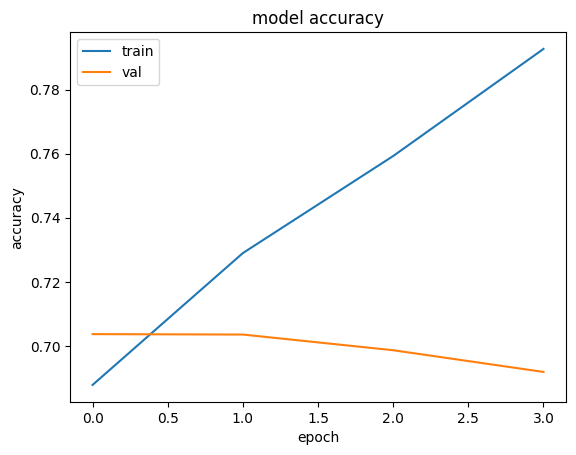

In [248]:
plt.plot(data1.history['accuracy'])
plt.plot(data1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## CNN

In [237]:
embedding_dim = 100

model = Sequential()
model.add(Embedding(voc_size, embedding_dim, input_length=sent_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_39 (Embedding)    (None, 15, 100)           800000    
                                                                 
 conv1d_30 (Conv1D)          (None, 11, 128)           64128     
                                                                 
 global_max_pooling1d_6 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_39 (Dense)            (None, 10)                1290      
                                                                 
 dense_40 (Dense)            (None, 1)                 11        
                                                                 
Total params: 865,429
Trainable params: 865,429
Non-trainable params: 0
_______________________________________________

In [238]:
data2 = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=32,callbacks=[callback])

Epoch 1/5
5667/5667 [==============================] - 140s 24ms/step - loss: 0.5847 - accuracy: 0.6851 - val_loss: 0.5664 - val_accuracy: 0.7021
Epoch 2/5
5667/5667 [==============================] - 126s 22ms/step - loss: 0.5122 - accuracy: 0.7453 - val_loss: 0.5770 - val_accuracy: 0.6961
Epoch 3/5
5667/5667 [==============================] - 127s 22ms/step - loss: 0.3837 - accuracy: 0.8261 - val_loss: 0.6737 - val_accuracy: 0.6735
Epoch 4/5
5667/5667 [==============================] - 125s 22ms/step - loss: 0.2374 - accuracy: 0.9005 - val_loss: 0.9136 - val_accuracy: 0.6670


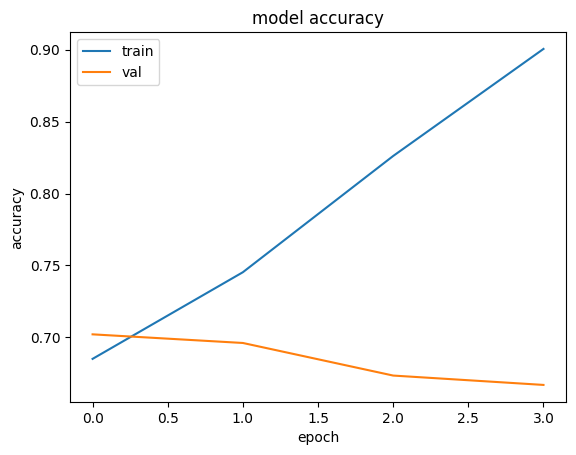

In [249]:
plt.plot(data2.history['accuracy'])
plt.plot(data2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## GRU

In [239]:
embedding_vector_features=100
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(GRU(150))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_40 (Embedding)    (None, 15, 100)           800000    
                                                                 
 gru_4 (GRU)                 (None, 150)               113400    
                                                                 
 dropout_17 (Dropout)        (None, 150)               0         
                                                                 
 dense_41 (Dense)            (None, 1)                 151       
                                                                 
Total params: 913,551
Trainable params: 913,551
Non-trainable params: 0
_________________________________________________________________
None


In [240]:
data3 = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
5667/5667 [==============================] - 793s 139ms/step - loss: 0.5798 - accuracy: 0.6890 - val_loss: 0.5648 - val_accuracy: 0.7033
Epoch 2/5
5667/5667 [==============================] - 909s 160ms/step - loss: 0.5276 - accuracy: 0.7329 - val_loss: 0.5609 - val_accuracy: 0.7061
Epoch 3/5
5667/5667 [==============================] - 384s 68ms/step - loss: 0.4856 - accuracy: 0.7607 - val_loss: 0.5785 - val_accuracy: 0.6958
Epoch 4/5
5667/5667 [==============================] - 379s 67ms/step - loss: 0.4392 - accuracy: 0.7896 - val_loss: 0.6118 - val_accuracy: 0.6876
Epoch 5/5
5667/5667 [==============================] - 380s 67ms/step - loss: 0.3841 - accuracy: 0.8235 - val_loss: 0.6837 - val_accuracy: 0.6794


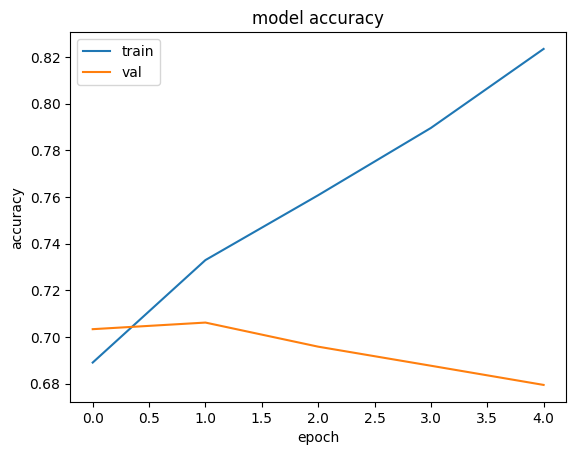

In [253]:
plt.plot(data3.history['accuracy'])
plt.plot(data3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## CNN+GRU

In [51]:
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(voc_size, output_dim=100, input_length=sent_length))
model.add(Conv1D(activation='relu', filters=4, kernel_size=4))
model.add(MaxPool1D())
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 15, 100)           800000    
                                                                 
 conv1d_16 (Conv1D)          (None, 12, 4)             1604      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6, 4)             0         
 )                                                               
                                                                 
 gru (GRU)                   (None, 128)               51456     
                                                                 
 dense_32 (Dense)            (None, 1)                 129       
                                                                 
Total params: 853,189
Trainable params: 853,189
Non-trainable params: 0
_______________________________________________

In [244]:
data4 = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
5667/5667 [==============================] - 135s 23ms/step - loss: 0.5930 - acc: 0.6777 - val_loss: 0.5736 - val_acc: 0.6956
Epoch 2/5
5667/5667 [==============================] - 134s 24ms/step - loss: 0.5291 - acc: 0.7321 - val_loss: 0.5826 - val_acc: 0.6893
Epoch 3/5
5667/5667 [==============================] - 135s 24ms/step - loss: 0.4630 - acc: 0.7809 - val_loss: 0.6049 - val_acc: 0.6858
Epoch 4/5
5667/5667 [==============================] - 136s 24ms/step - loss: 0.4018 - acc: 0.8174 - val_loss: 0.6774 - val_acc: 0.6706
Epoch 5/5
5667/5667 [==============================] - 136s 24ms/step - loss: 0.3478 - acc: 0.8478 - val_loss: 0.7347 - val_acc: 0.6579


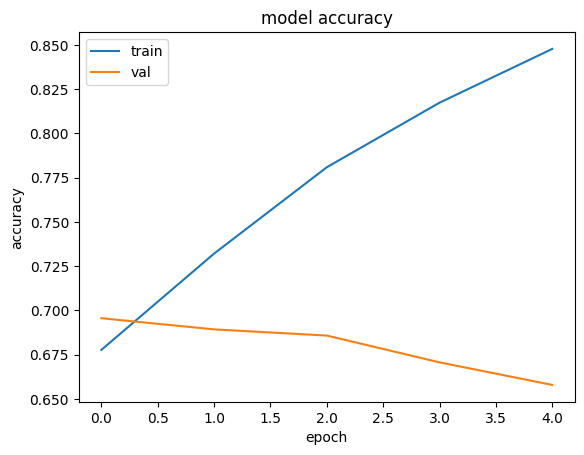

In [259]:
plt.plot(data4.history['acc'])
plt.plot(data4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## CNN+Bi-LSTM

In [245]:
embedding_dim = 100

model = Sequential()
model.add(Embedding(voc_size, embedding_dim, input_length=sent_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_44 (Embedding)    (None, 15, 100)           800000    
                                                                 
 conv1d_34 (Conv1D)          (None, 11, 128)           64128     
                                                                 
 bidirectional_18 (Bidirecti  (None, 300)              334800    
 onal)                                                           
                                                                 
 dense_43 (Dense)            (None, 10)                3010      
                                                                 
 dense_44 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,201,949
Trainable params: 1,201,949
Non-trainable params: 0
___________________________________________

In [246]:
data5 = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
5667/5667 [==============================] - 693s 122ms/step - loss: 0.5827 - accuracy: 0.6857 - val_loss: 0.5640 - val_accuracy: 0.7029
Epoch 2/5
5667/5667 [==============================] - 587s 104ms/step - loss: 0.5182 - accuracy: 0.7390 - val_loss: 0.5735 - val_accuracy: 0.6982
Epoch 3/5
5667/5667 [==============================] - 347s 61ms/step - loss: 0.4271 - accuracy: 0.7972 - val_loss: 0.6470 - val_accuracy: 0.6854
Epoch 4/5
5667/5667 [==============================] - 351s 62ms/step - loss: 0.3216 - accuracy: 0.8573 - val_loss: 0.7626 - val_accuracy: 0.6732
Epoch 5/5
5667/5667 [==============================] - 355s 63ms/step - loss: 0.2218 - accuracy: 0.9069 - val_loss: 0.9819 - val_accuracy: 0.6673


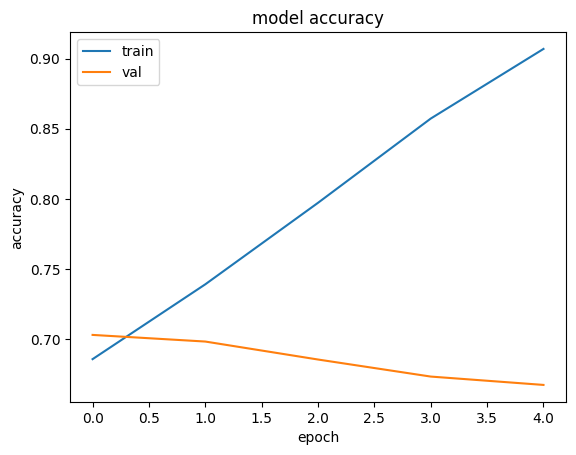

In [256]:
plt.plot(data5.history['accuracy'])
plt.plot(data5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [64]:
modelName = ["Bi-LSTM","GRU","CNN+GRU","CNN+Bi-LSTM"]
acc = [79.27, 82.35, 84.48, 90.69]
valAcc =  [69.19, 67.94, 65.79, 66.73]
exe = [1256.75, 569,135.2, 466.6]
dfData = pd.DataFrame(data = list(zip(modelName,acc, valAcc,exe)), columns = ["Model name","Accuracy","Validation Accuracy", "Avg Training Time"])

dfData.head()

,Model name,Accuracy,Validation Accuracy,Avg Training Time
0,Bi-LSTM,79.27,69.19,1256.75
1,GRU,82.35,67.94,569.00
2,CNN+GRU,84.48,65.79,135.20
3,CNN+Bi-LSTM,90.69,66.73,466.60


## Variations

### Adam & Sigmoid

In [35]:
embedding_dim = 100

model = Sequential()
model.add(Embedding(voc_size, embedding_dim, input_length=sent_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 15, 100)           800000    
                                                                 
 conv1d_8 (Conv1D)           (None, 11, 128)           64128     
                                                                 
 bidirectional_8 (Bidirectio  (None, 300)              334800    
 nal)                                                            
                                                                 
 dense_16 (Dense)            (None, 10)                3010      
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,201,949
Trainable params: 1,201,949
Non-trainable params: 0
____________________________________________

In [36]:
data1 = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
5667/5667 [==============================] - 220s 38ms/step - loss: 0.5867 - accuracy: 0.6832 - val_loss: 0.5657 - val_accuracy: 0.7018
Epoch 2/5
5667/5667 [==============================] - 212s 37ms/step - loss: 0.5245 - accuracy: 0.7383 - val_loss: 0.5713 - val_accuracy: 0.6999
Epoch 3/5
5667/5667 [==============================] - 251s 44ms/step - loss: 0.4347 - accuracy: 0.8007 - val_loss: 0.6216 - val_accuracy: 0.6850
Epoch 4/5
5667/5667 [==============================] - 248s 44ms/step - loss: 0.3286 - accuracy: 0.8643 - val_loss: 0.7235 - val_accuracy: 0.6713
Epoch 5/5
5667/5667 [==============================] - 232s 41ms/step - loss: 0.2349 - accuracy: 0.9108 - val_loss: 0.8733 - val_accuracy: 0.6555


### Adam & Relu

In [37]:
embedding_dim = 100

model = Sequential()
model.add(Embedding(voc_size, embedding_dim, input_length=sent_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 15, 100)           800000    
                                                                 
 conv1d_9 (Conv1D)           (None, 11, 128)           64128     
                                                                 
 bidirectional_9 (Bidirectio  (None, 300)              334800    
 nal)                                                            
                                                                 
 dense_18 (Dense)            (None, 10)                3010      
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,201,949
Trainable params: 1,201,949
Non-trainable params: 0
____________________________________________

In [38]:
data2 = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
5667/5667 [==============================] - 213s 37ms/step - loss: 0.5905 - accuracy: 0.6820 - val_loss: 0.5764 - val_accuracy: 0.6962
Epoch 2/5
5667/5667 [==============================] - 205s 36ms/step - loss: 0.5284 - accuracy: 0.7308 - val_loss: 0.5758 - val_accuracy: 0.7004
Epoch 3/5
5667/5667 [==============================] - 209s 37ms/step - loss: 0.4550 - accuracy: 0.7856 - val_loss: 0.6633 - val_accuracy: 0.6879
Epoch 4/5
5667/5667 [==============================] - 211s 37ms/step - loss: 0.3904 - accuracy: 0.8315 - val_loss: 0.7150 - val_accuracy: 0.6756
Epoch 5/5
5667/5667 [==============================] - 205s 36ms/step - loss: 0.3571 - accuracy: 0.8579 - val_loss: 0.9256 - val_accuracy: 0.6666


### Adam & SoftMax

In [39]:
embedding_dim = 100

model = Sequential()
model.add(Embedding(voc_size, embedding_dim, input_length=sent_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 15, 100)           800000    
                                                                 
 conv1d_10 (Conv1D)          (None, 11, 128)           64128     
                                                                 
 bidirectional_10 (Bidirecti  (None, 300)              334800    
 onal)                                                           
                                                                 
 dense_20 (Dense)            (None, 10)                3010      
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,201,949
Trainable params: 1,201,949
Non-trainable params: 0
___________________________________________

In [40]:
data3 = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
5667/5667 [==============================] - 266s 46ms/step - loss: 0.5838 - accuracy: 0.4309 - val_loss: 0.5642 - val_accuracy: 0.4299
Epoch 2/5
5667/5667 [==============================] - 296s 52ms/step - loss: 0.5149 - accuracy: 0.4309 - val_loss: 0.5718 - val_accuracy: 0.4299
Epoch 3/5
5667/5667 [==============================] - 292s 52ms/step - loss: 0.4220 - accuracy: 0.4309 - val_loss: 0.6368 - val_accuracy: 0.4299
Epoch 4/5
5667/5667 [==============================] - 399s 70ms/step - loss: 0.3174 - accuracy: 0.4309 - val_loss: 0.7568 - val_accuracy: 0.4299
Epoch 5/5
5667/5667 [==============================] - 404s 71ms/step - loss: 0.2150 - accuracy: 0.4309 - val_loss: 1.0049 - val_accuracy: 0.4299


### Adam & TanH

In [41]:
embedding_dim = 100

model = Sequential()
model.add(Embedding(voc_size, embedding_dim, input_length=sent_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 15, 100)           800000    
                                                                 
 conv1d_11 (Conv1D)          (None, 11, 128)           64128     
                                                                 
 bidirectional_11 (Bidirecti  (None, 300)              334800    
 onal)                                                           
                                                                 
 dense_22 (Dense)            (None, 10)                3010      
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,201,949
Trainable params: 1,201,949
Non-trainable params: 0
___________________________________________

In [42]:
data4 = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
5667/5667 [==============================] - 335s 59ms/step - loss: 0.5850 - accuracy: 0.6851 - val_loss: 0.5642 - val_accuracy: 0.7042
Epoch 2/5
5667/5667 [==============================] - 295s 52ms/step - loss: 0.5186 - accuracy: 0.7390 - val_loss: 0.5729 - val_accuracy: 0.6992
Epoch 3/5
5667/5667 [==============================] - 257s 45ms/step - loss: 0.4195 - accuracy: 0.8042 - val_loss: 0.6447 - val_accuracy: 0.6850
Epoch 4/5
5667/5667 [==============================] - 253s 45ms/step - loss: 0.3071 - accuracy: 0.8712 - val_loss: 0.7649 - val_accuracy: 0.6642
Epoch 5/5
5667/5667 [==============================] - 254s 45ms/step - loss: 0.2077 - accuracy: 0.9216 - val_loss: 0.9705 - val_accuracy: 0.6536


### SGD & Sigmoid

In [43]:
embedding_dim = 100

model = Sequential()
model.add(Embedding(voc_size, embedding_dim, input_length=sent_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 15, 100)           800000    
                                                                 
 conv1d_12 (Conv1D)          (None, 11, 128)           64128     
                                                                 
 bidirectional_12 (Bidirecti  (None, 300)              334800    
 onal)                                                           
                                                                 
 dense_24 (Dense)            (None, 10)                3010      
                                                                 
 dense_25 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,201,949
Trainable params: 1,201,949
Non-trainable params: 0
___________________________________________

In [44]:
data5 = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
5667/5667 [==============================] - 186s 32ms/step - loss: 0.6644 - accuracy: 0.5963 - val_loss: 0.6518 - val_accuracy: 0.6128
Epoch 2/5
5667/5667 [==============================] - 178s 31ms/step - loss: 0.6519 - accuracy: 0.6130 - val_loss: 0.6492 - val_accuracy: 0.6140
Epoch 3/5
5667/5667 [==============================] - 180s 32ms/step - loss: 0.6503 - accuracy: 0.6142 - val_loss: 0.6480 - val_accuracy: 0.6166
Epoch 4/5
5667/5667 [==============================] - 182s 32ms/step - loss: 0.6495 - accuracy: 0.6149 - val_loss: 0.6467 - val_accuracy: 0.6179
Epoch 5/5
5667/5667 [==============================] - 181s 32ms/step - loss: 0.6483 - accuracy: 0.6146 - val_loss: 0.6456 - val_accuracy: 0.6172


### SGD & Relu

In [45]:
embedding_dim = 100

model = Sequential()
model.add(Embedding(voc_size, embedding_dim, input_length=sent_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 15, 100)           800000    
                                                                 
 conv1d_13 (Conv1D)          (None, 11, 128)           64128     
                                                                 
 bidirectional_13 (Bidirecti  (None, 300)              334800    
 onal)                                                           
                                                                 
 dense_26 (Dense)            (None, 10)                3010      
                                                                 
 dense_27 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,201,949
Trainable params: 1,201,949
Non-trainable params: 0
___________________________________________

In [46]:
data6 = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
5667/5667 [==============================] - 178s 31ms/step - loss: 8.6782 - accuracy: 0.4309 - val_loss: 8.6934 - val_accuracy: 0.4299
Epoch 2/5
5667/5667 [==============================] - 177s 31ms/step - loss: 8.6791 - accuracy: 0.4309 - val_loss: 8.6934 - val_accuracy: 0.4299
Epoch 3/5
5667/5667 [==============================] - 179s 32ms/step - loss: 8.6791 - accuracy: 0.4309 - val_loss: 8.6934 - val_accuracy: 0.4299
Epoch 4/5
5667/5667 [==============================] - 213s 38ms/step - loss: 8.6791 - accuracy: 0.4309 - val_loss: 8.6934 - val_accuracy: 0.4299
Epoch 5/5
5667/5667 [==============================] - 195s 34ms/step - loss: 8.6791 - accuracy: 0.4309 - val_loss: 8.6934 - val_accuracy: 0.4299


### SGD & SoftMax

In [47]:
embedding_dim = 100

model = Sequential()
model.add(Embedding(voc_size, embedding_dim, input_length=sent_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 15, 100)           800000    
                                                                 
 conv1d_14 (Conv1D)          (None, 11, 128)           64128     
                                                                 
 bidirectional_14 (Bidirecti  (None, 300)              334800    
 onal)                                                           
                                                                 
 dense_28 (Dense)            (None, 10)                3010      
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,201,949
Trainable params: 1,201,949
Non-trainable params: 0
___________________________________________

In [48]:
data7 = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
5667/5667 [==============================] - 206s 36ms/step - loss: 0.6602 - accuracy: 0.4309 - val_loss: 0.6498 - val_accuracy: 0.4299
Epoch 2/5
5667/5667 [==============================] - 207s 37ms/step - loss: 0.6504 - accuracy: 0.4309 - val_loss: 0.6480 - val_accuracy: 0.4299
Epoch 3/5
5667/5667 [==============================] - 223s 39ms/step - loss: 0.6485 - accuracy: 0.4309 - val_loss: 0.6451 - val_accuracy: 0.4299
Epoch 4/5
5667/5667 [==============================] - 232s 41ms/step - loss: 0.6454 - accuracy: 0.4309 - val_loss: 0.6412 - val_accuracy: 0.4299
Epoch 5/5
5667/5667 [==============================] - 243s 43ms/step - loss: 0.6379 - accuracy: 0.4309 - val_loss: 0.6304 - val_accuracy: 0.4299


### SGD & TanH

In [49]:
embedding_dim = 100

model = Sequential()
model.add(Embedding(voc_size, embedding_dim, input_length=sent_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 15, 100)           800000    
                                                                 
 conv1d_15 (Conv1D)          (None, 11, 128)           64128     
                                                                 
 bidirectional_15 (Bidirecti  (None, 300)              334800    
 onal)                                                           
                                                                 
 dense_30 (Dense)            (None, 10)                3010      
                                                                 
 dense_31 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,201,949
Trainable params: 1,201,949
Non-trainable params: 0
___________________________________________

In [50]:
data8 = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
5667/5667 [==============================] - 363s 62ms/step - loss: 0.6563 - accuracy: 0.6082 - val_loss: 0.6506 - val_accuracy: 0.6147
Epoch 2/5
5667/5667 [==============================] - 351s 62ms/step - loss: 0.6505 - accuracy: 0.6144 - val_loss: 0.6462 - val_accuracy: 0.6184
Epoch 3/5
5667/5667 [==============================] - 337s 59ms/step - loss: 0.6472 - accuracy: 0.6165 - val_loss: 0.6454 - val_accuracy: 0.6194
Epoch 4/5
5667/5667 [==============================] - 358s 63ms/step - loss: 0.6305 - accuracy: 0.6348 - val_loss: 0.6105 - val_accuracy: 0.6631
Epoch 5/5
5667/5667 [==============================] - 458s 81ms/step - loss: 0.5992 - accuracy: 0.6688 - val_loss: 0.5846 - val_accuracy: 0.6857


In [70]:
accuracy_sigadam = ['adam','sigmoid', 
               max(data1.history['accuracy']), 
               max(data1.history['val_accuracy'])]

accuracy_reladam = ['adam','relu', 
                max(data2.history['accuracy']), 
                max(data2.history['val_accuracy'])]

accuracy_softadam = ['adam','softmax', 
                max(data3.history['accuracy']), 
                max(data3.history['val_accuracy'])]

accuracy_tanadam = ['adam','tanh', 
                max(data4.history['accuracy']), 
                max(data4.history['val_accuracy'])]

accuracy_sigsgd = ['sgd','sigmoid', 
               max(data5.history['accuracy']), 
               max(data5.history['val_accuracy'])]

accuracy_relsgd = ['sgd','relu', 
                max(data6.history['accuracy']), 
                max(data6.history['val_accuracy'])]

accuracy_softsgd = ['sgd','softmax', 
                max(data7.history['accuracy']), 
                max(data7.history['val_accuracy'])]

accuracy_tansgd = ['sgd','tanh', 
                max(data8.history['accuracy']), 
                max(data8.history['val_accuracy'])]

In [71]:
comparison = pd.DataFrame([accuracy_sigadam,accuracy_reladam,accuracy_softadam,accuracy_tanadam,accuracy_sigsgd,accuracy_relsgd,accuracy_softsgd,accuracy_tansgd])

In [72]:
comparison.columns = ['Optimizer','Activation', 'Training_Accuracy', 'Validation_Accuracy']
comparison

,Optimizer,Activation,Training_Accuracy,Validation_Accuracy
0,adam,sigmoid,0.910810,0.701818
1,adam,relu,0.857871,0.700352
2,adam,softmax,0.430871,0.429928
3,adam,tanh,0.921620,0.704203
4,sgd,sigmoid,0.614904,0.617940
5,sgd,relu,0.430904,0.429928
6,sgd,softmax,0.430871,0.429928
7,sgd,tanh,0.668808,0.685728


### With 90:10 Ratio split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.1, random_state=42)

In [18]:
embedding_dim = 100

model = Sequential()
model.add(Embedding(voc_size, embedding_dim, input_length=sent_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 100)           800000    
                                                                 
 conv1d (Conv1D)             (None, 11, 128)           64128     
                                                                 
 bidirectional (Bidirectiona  (None, 300)              334800    
 l)                                                              
                                                                 
 dense (Dense)               (None, 10)                3010      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,201,949
Trainable params: 1,201,949
Non-trainable params: 0
______________________________________________

In [19]:
data90 = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
7612/7612 [==============================] - 226s 29ms/step - loss: 0.5806 - accuracy: 0.6894 - val_loss: 0.5565 - val_accuracy: 0.7105
Epoch 2/5
7612/7612 [==============================] - 218s 29ms/step - loss: 0.5230 - accuracy: 0.7354 - val_loss: 0.5601 - val_accuracy: 0.7091
Epoch 3/5
7612/7612 [==============================] - 223s 29ms/step - loss: 0.4541 - accuracy: 0.7861 - val_loss: 0.6018 - val_accuracy: 0.6895
Epoch 4/5
7612/7612 [==============================] - 238s 31ms/step - loss: 0.3660 - accuracy: 0.8411 - val_loss: 0.6622 - val_accuracy: 0.6786
Epoch 5/5
7612/7612 [==============================] - 234s 31ms/step - loss: 0.2922 - accuracy: 0.8854 - val_loss: 0.8027 - val_accuracy: 0.6771
